
# Week 1 Lab – Linear Regression with One Feature

In this lab we will work with a very simple version of supervised learning:

- Our data consists of pairs $(x^{(i)}, y^{(i)})$, where $x^{(i)}$ is one feature and $y^{(i)}$ is the target.
- We will use a **linear regression model** with one feature.
- We will measure how good the model is using a **cost function** based on mean squared error.
- We will train the model with **gradient descent**.
- This file uses vectorization in python. If you are not familiar with vectorization you can start with 
the notebook of similar name but that do not use vectorization.



## 0. Theory Refresher

### 0.1 Linear Regression (One Feature)

We assume there is (approximately) a linear relationship between the input $x$ and the output $y$.  
Our model (or hypothesis) is a function that depends on the parameters $w$ and $b$:

$$
f_{w,b}(x) = wx + b
$$

- $w$ is the **slope**: how much $f_{w,b}(x)$ changes when $x$ increases by 1.
- $b$ is the **intercept**: the value of $f_{w,b}(x)$ when $x = 0$.
- For a dataset with $m$ examples, we write the $i$-th example as $(x^{(i)}, y^{(i)})$.  
  The prediction for that example is:
  $$
  \hat{y}^{(i)} = f_{w,b}(x^{(i)}) = w x^{(i)} + b
  $$



### 0.2 Cost Function (Mean Squared Error)

We need a way to measure how well a particular line (given by $w$ and $b$) fits the data.

We use the **mean squared error (MSE)** cost function:

$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} \big( \hat{y}^{(i)} - y^{(i)} \big)^2
       = \frac{1}{2m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)^2
$$

- The term $(\hat{y}^{(i)} - y^{(i)})$ is the **error** for example $i$.
- We square the error so that positive and negative errors do not cancel out, and to penalize large errors more.
- The factor $\frac{1}{2m}$ is for mathematical convenience when taking derivatives.

Our goal is to find values of $w$ and $b$ that **minimize** $J(w,b)$.



### 0.3 Gradient Descent

To minimize $J(w,b)$, we use **gradient descent**.  
The idea is to start with some initial $(w,b)$ and repeatedly update them in the direction that decreases the cost.

We compute the partial derivatives:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big) x^{(i)}
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)
$$

Given a **learning rate** $\alpha > 0$, we update:

$$
w := w - \alpha \frac{\partial J}{\partial w}, \qquad
b := b - \alpha \frac{\partial J}{\partial b}
$$

We repeat these updates many times. If $\alpha$ is chosen well, the cost $J(w,b)$ will decrease and $(w,b)$ will move toward values that fit the data.


## 1. Setup

In [1]:

# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)



## 2. Create or Load a Simple Dataset




In [3]:
import numpy as np

# Stellar mass (M) and luminosity (L) dataset
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

m = len(M)

print(f"Number of examples m = {m}")
print("M:", M)
print("L:", L)


Number of examples m = 10
M: [0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4]
L: [ 0.15  0.35  1.    2.3   4.1   7.   11.2  17.5  25.   35.  ]


### 2.1 Visualize the Data

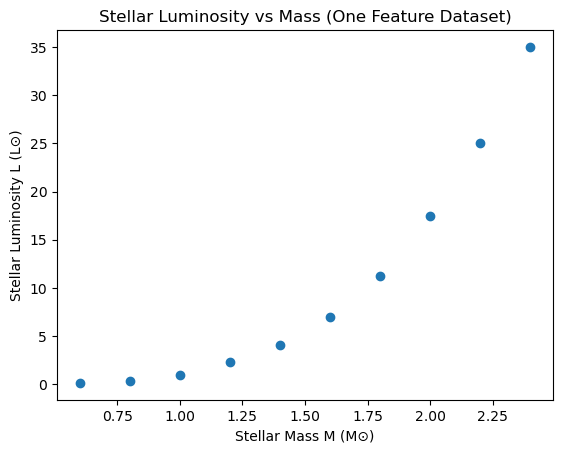

In [4]:
plt.figure()
plt.scatter(M, L)
plt.xlabel("Stellar Mass M (M⊙)")
plt.ylabel("Stellar Luminosity L (L⊙)")
plt.title("Stellar Luminosity vs Mass (One Feature Dataset)")
plt.show()



## 3. Linear Regression Model with One Feature



In [ ]:

def predict(M, w, b):
    """
    Predict stellar luminosity using the linear model:
    L_hat = w * M + b
    """
    return w * M + b


w_test = 0.0
b_test = 0.0
L_hat_test = predict(M, w_test, b_test)
print("First 5 predictions with w=0, b=0:", L_hat_test[:5])


First 5 predictions with w=0, b=0: [0. 0. 0. 0. 0.]



## 4. Cost Function 



In [6]:
def compute_cost(M, L, w, b):
    """
    Compute the mean squared error cost for stellar luminosity:
    J(w,b) = (1/2m) * sum (w*M + b - L)^2
    """
    m = M.shape[0]
    L_hat = w * M + b
    errors = L_hat - L
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost
print("Cost at w=0, b=0 (initial parameters):", compute_cost(M, L, 0.0, 0.0))


Cost at w=0, b=0 (initial parameters): 117.69675000000001



### 4.1 Visualize the Cost Function as a Surface



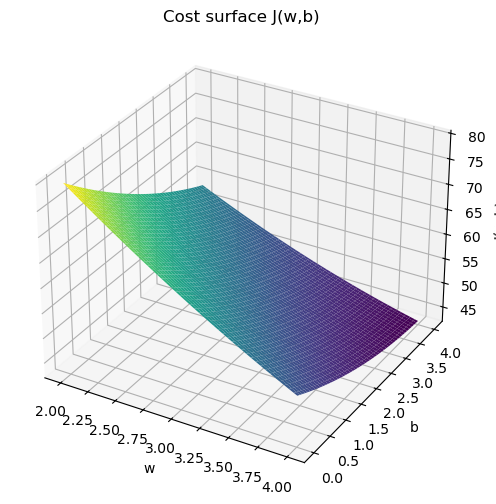

In [7]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

w_values = np.linspace(2.0, 4.0, 200)
b_values = np.linspace(0.0, 4.0, 200)

W, B = np.meshgrid(w_values, b_values)
J_vals = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_vals[i, j] = compute_cost(M, L, W[i, j], B[i, j])


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w,b)")
ax.set_title("Cost surface J(w,b)")
plt.show()




## 5. Gradient Descent



In [8]:
def compute_gradients(M, L, w, b):
    m = M.shape[0]
    y_hat = w * M + b   # f_{w,b}(M)
    errors = y_hat - L

    dj_dw = (1 / m) * np.sum(errors * M)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db


dj_dw_test, dj_db_test = compute_gradients(M, L, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)



Gradients at w=0, b=0: -21.523 -10.36


### 5.1 Implement the Gradient Descent Loop

In [9]:

def gradient_descent(M, L, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M, L, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history


alpha = 0.01
num_iterations = 2000

w_init = 0.0
b_init = 0.0

w_learned, b_learned, history = gradient_descent(M, L, w_init, b_init, alpha, num_iterations)

print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)



Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration  200: w= 7.9674, b=-0.0073, cost= 28.0913
Iteration  400: w= 9.7253, b=-2.9093, cost= 22.3208
Iteration  600: w=11.1759, b=-5.3129, cost= 18.3703
Iteration  800: w=12.3762, b=-7.3015, cost= 15.6658
Iteration 1000: w=13.3693, b=-8.9470, cost= 13.8142
Iteration 1200: w=14.1910, b=-10.3085, cost= 12.5466
Iteration 1400: w=14.8709, b=-11.4350, cost= 11.6788
Iteration 1600: w=15.4334, b=-12.3670, cost= 11.0847
Iteration 1800: w=15.8989, b=-13.1383, cost= 10.6780

Learned parameters:
w = 16.2822484076734
b = -13.77345340049044


### Gradient Descent Convergence on Stellar Data

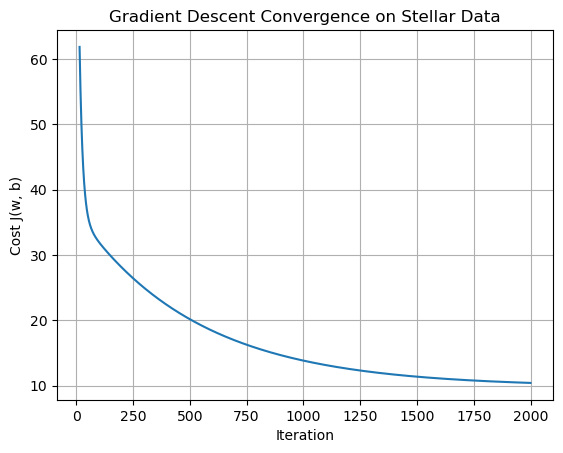

In [10]:
iterations = [it for it, c in history]
costs = [c for it, c in history]

plt.figure()
plt.plot(iterations[15:], costs[15:])
plt.xlabel("Iteration")
plt.ylabel("Cost J(w, b)")
plt.title("Gradient Descent Convergence on Stellar Data")
plt.grid(True)
plt.show()


### Linear Regression Fit: Stellar Mass vs Luminosity

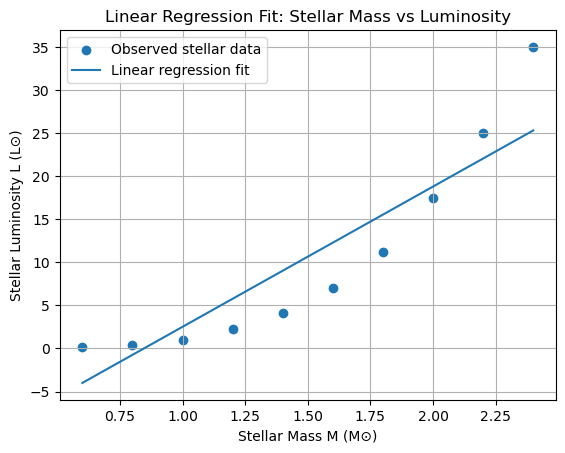

In [11]:
plt.figure()
plt.scatter(M, L, label="Observed stellar data")
L_pred = predict(M, w_learned, b_learned)
plt.plot(M, L_pred, label="Linear regression fit")
plt.xlabel("Stellar Mass M (M⊙)")
plt.ylabel("Stellar Luminosity L (L⊙)")
plt.title("Linear Regression Fit: Stellar Mass vs Luminosity")
plt.legend()
plt.grid(True)
plt.show()



## 6. Exercises (for You to Try)

1. **Change the learning rate $\alpha$**:
   - Try values like `0.001`, `0.1`, `0.5`.
   - What happens to the speed of convergence? Does the algorithm diverge for some values?
α = 0.001
The algorithm converges very slowly. The cost decreases smoothly but requires many iterations.

α = 0.1
The algorithm converges much faster and remains stable. This value provides a good balance between speed and stability.

α = 0.5
The algorithm diverges. The cost increases or oscillates due to excessively large parameter updates.

2. **Change the number of iterations**:
   - Try `num_iterations = 100`, `500`, `2000`.
   - How does the final cost change?

100 iterations:
The model does not fully converge; the final cost remains relatively high.

500 iterations:
The cost decreases significantly and the model approaches convergence.

2000 iterations:
The cost stabilizes, showing little improvement beyond this point.

3. **Try different initial values** 
   - Does gradient descent still converge to similar values?
Gradient descent is robust to initialization for convex cost functions like linear regression.
4. **Noise level**:
   - Go back to the cell where we define `noise_array` and change `scale` (e.g., `scale=0.5` or `scale=5.0`).
   - How does the fitted line look with less/more noise?
Lower noise (e.g., scale = 0.5):
The fitted line closely matches the data, and the final cost is lower.

Higher noise (e.g., scale = 5.0):
The data becomes more scattered, the fitted line is less precise, and the final cost increases.